In [1]:
import seaborn as sns
import pandas as pd
import warnings
import pickle
%run distUtils.py

In [2]:
alpha = get_alpha(2.5,N=100_000)
beta_arr, data = gen_inf_data(N=100_000, alpha=alpha, start_day=0, end_day=20, beta_pts=True)

100%|██████████| 100000/100000 [04:29<00:00, 371.47it/s]


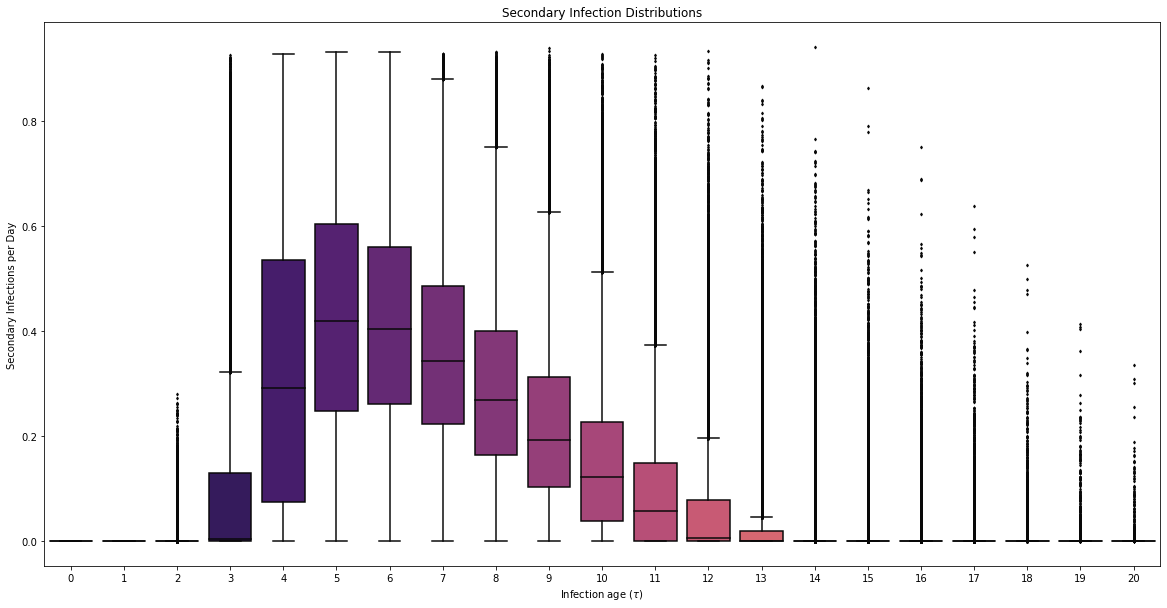

In [3]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=data, orient='v', ax=ax,fliersize=2,palette='magma')
plt.title("Secondary Infection Distributions")
plt.xlabel(r"Infection age ($\tau$)")
plt.ylabel("Secondary Infections per Day")
plt.show()

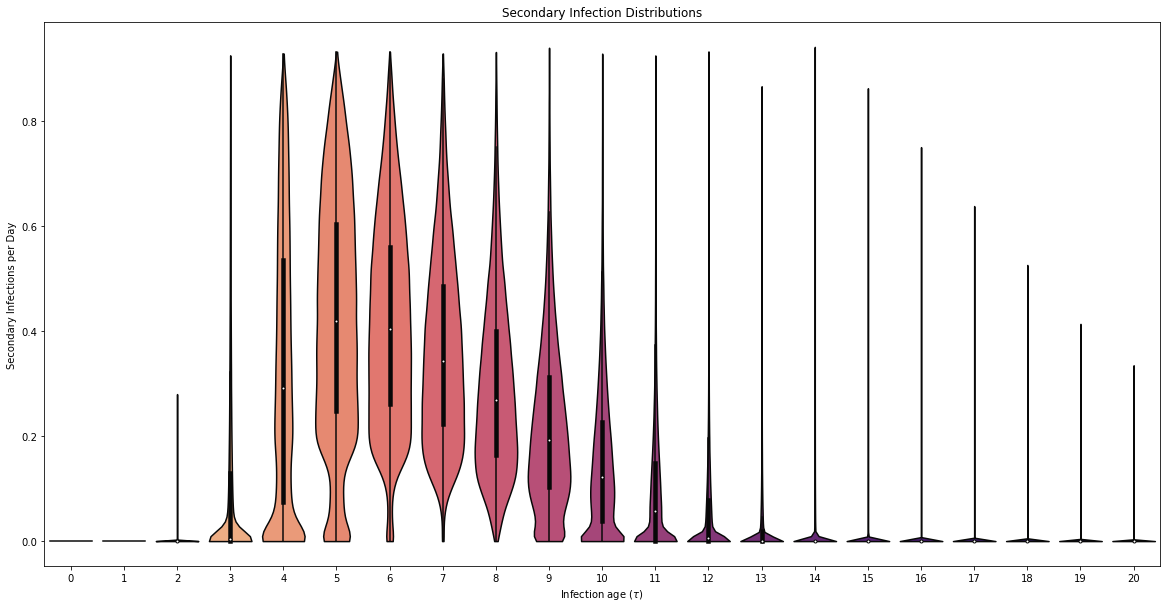

In [4]:
fig, ax = plt.subplots(figsize=(20,10))
sns.violinplot(data=data, orient='v', ax=ax, scale='width',cut=0,palette='magma_r')
plt.title("Secondary Infection Distributions")
plt.xlabel(r"Infection age ($\tau$)")
plt.ylabel("Secondary Infections per Day")
plt.show()

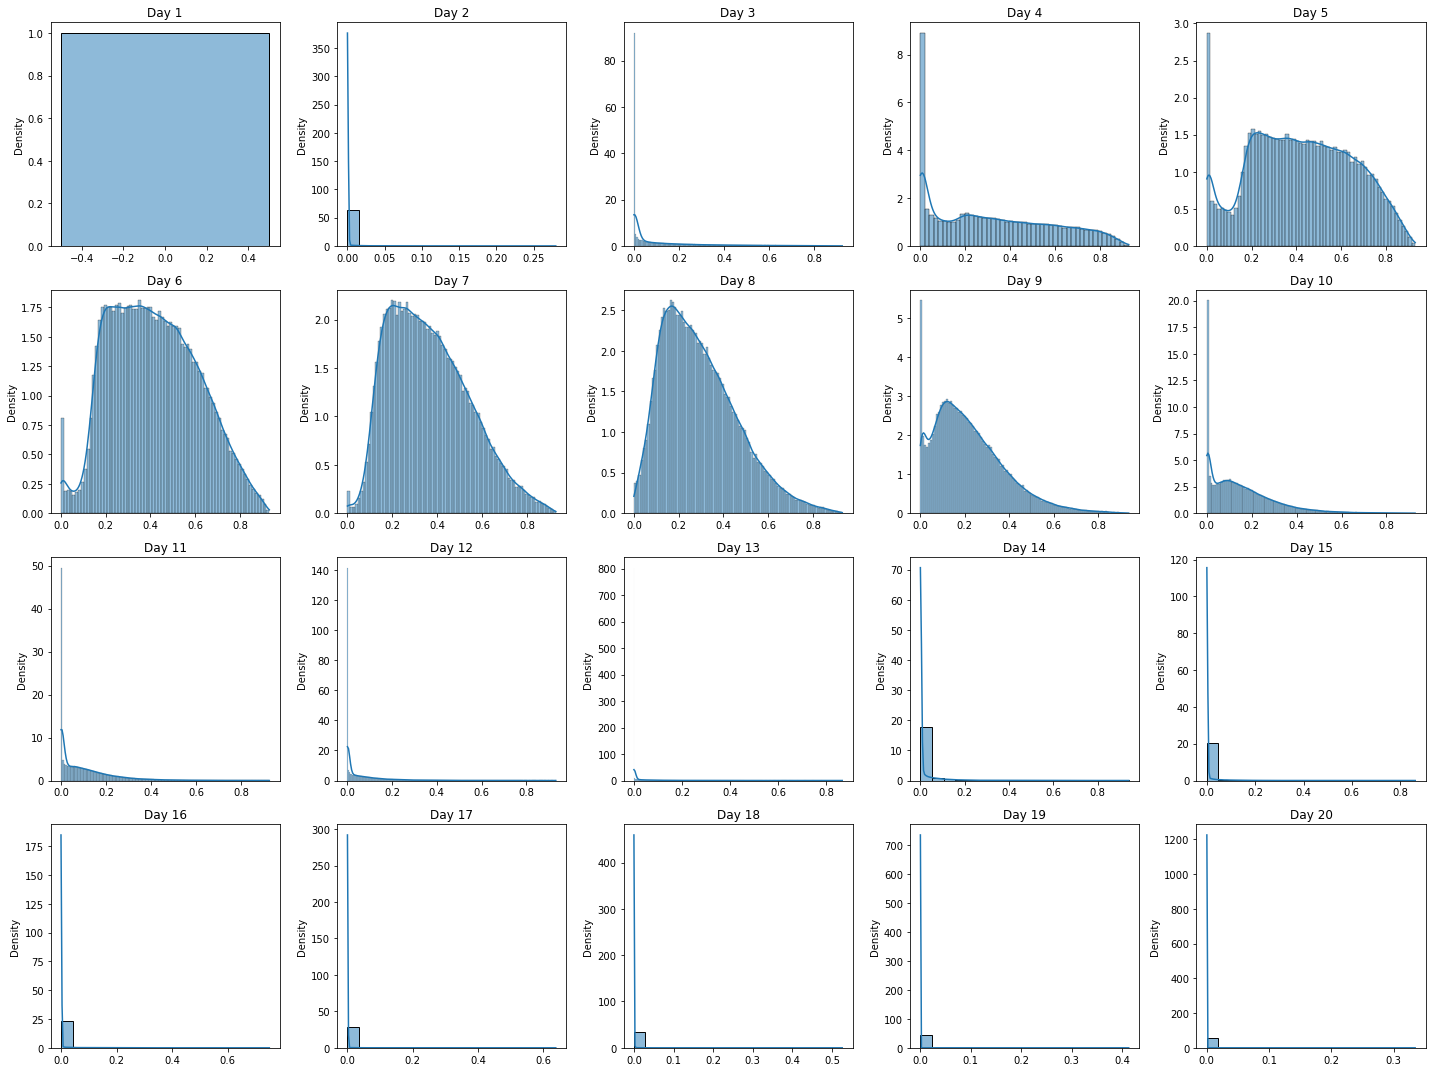

In [5]:
fig, axes = plt.subplots(4,5,figsize=(20,15))
for i, ax in enumerate(axes.flatten()):
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        sns.histplot(data[:,i+1], ax = ax, kde=True, stat='density', line_kws={'color':'r'})
        ax.set_title(f"Day {i+1}")
plt.tight_layout()

# Mean of Samples
- cutoffs 
    - Days 0,1,2 Have negligible infections (pracitically 0)
    - Days 16,17 ... Have negligible infections
    - Only count days 3,15 (inclusive)


In [42]:
N = 100_000
sample_size = 50

sample_data = [] # Mean infections of 10 people
for i in tqdm(range(N)):
    indices = np.random.choice(np.arange(data.shape[0]),sample_size)
    sample_data.append(data[indices].mean(axis=0))

sample_data = np.array(sample_data)

100%|██████████| 100000/100000 [00:13<00:00, 7373.90it/s]


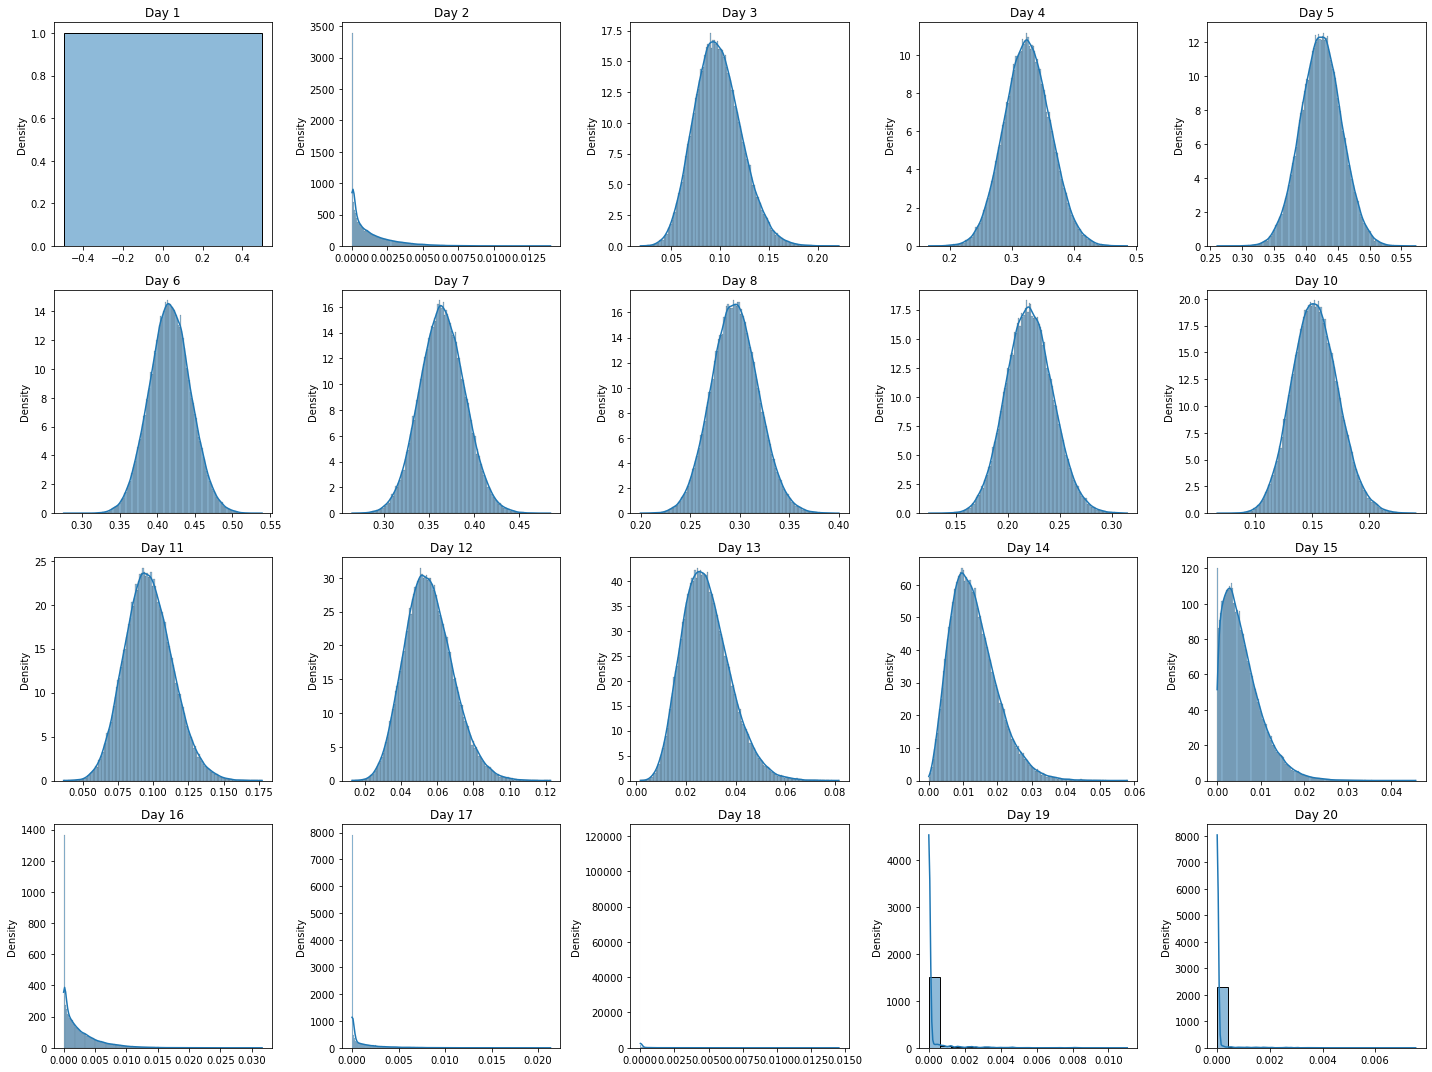

In [43]:
fig, axes = plt.subplots(4,5,figsize=(20,15))
for i, ax in enumerate(axes.flatten()):
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        sns.histplot(sample_data[:,i+1], ax = ax, kde=True, stat='density', line_kws={'color':'r'})
        ax.set_title(f"Day {i+1}")
plt.tight_layout()

In [9]:
import scipy.stats as st
[st.chi, st.chi2, st.betaprime, st.ncx2, st.f, st.gamma] # Continuous distributions with semi-infinite support (x \in [0,\infty])
# Gamma is the way to go!!! (more general form of chi2 anyways)

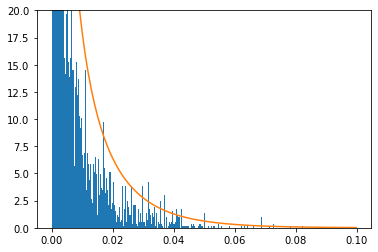

In [36]:
day = 16
fig, ax = plt.subplots(1,1)
dist = st.gamma
current_data = sample_data[:,day]
dist_params = dist.fit(current_data)
ax.hist(current_data,bins='auto',density=True)
xs = np.linspace(current_data.min(),current_data.max(),200)
ax.plot(xs,dist.pdf(xs,*dist_params))
ax.set_ylim([0,20])
plt.show()

In [37]:
dist = st.gamma
param_dict = dict()
for day in tqdm(range(3,15+1)):
    params = dist.fit(sample_data[:,day])
    param_dict[day] = params

100%|██████████| 13/13 [00:10<00:00,  1.20it/s]


In [38]:
param_dict

{3: (5.301941002463371, -0.026693373199305207, 0.02349043333105298),
 4: (252.14962895325738, -0.9927822710133167, 0.005224801428991194),
 5: (36356.503738806336, -13.29150360799273, 0.0003772379850182588),
 6: (751.2113273429273, -1.2621874440457281, 0.0022353256207562158),
 7: (141.74118579326722, -0.30177974082314335, 0.0047059912522378336),
 8: (66.13846332671301, -0.1359205591893147, 0.006521673584381098),
 9: (40.94541091124748, -0.09946126391135396, 0.007832068440718964),
 10: (22.256873185308265, -0.05986567569607234, 0.00956520822283739),
 11: (10.71109772155187, -0.02704161456436714, 0.01159354951553948),
 12: (4.631369058533229, -0.008594554787355307, 0.013878530801002223),
 13: (1.5869510310185997, -0.0007652723360705862, 0.01839558128026778),
 14: (0.3838769575272725, -8.852822901281148e-33, 0.023381500141373447),
 15: (0.1644803247226836, -1.15017462302381e-31, 0.0368239218096245)}

In [44]:
pd.DataFrame(sample_data).to_csv("Sample50.csv",index =False)

# Exponential Transforms to Unimodal Distributions

100%|██████████| 20/20 [04:38<00:00, 13.91s/it]


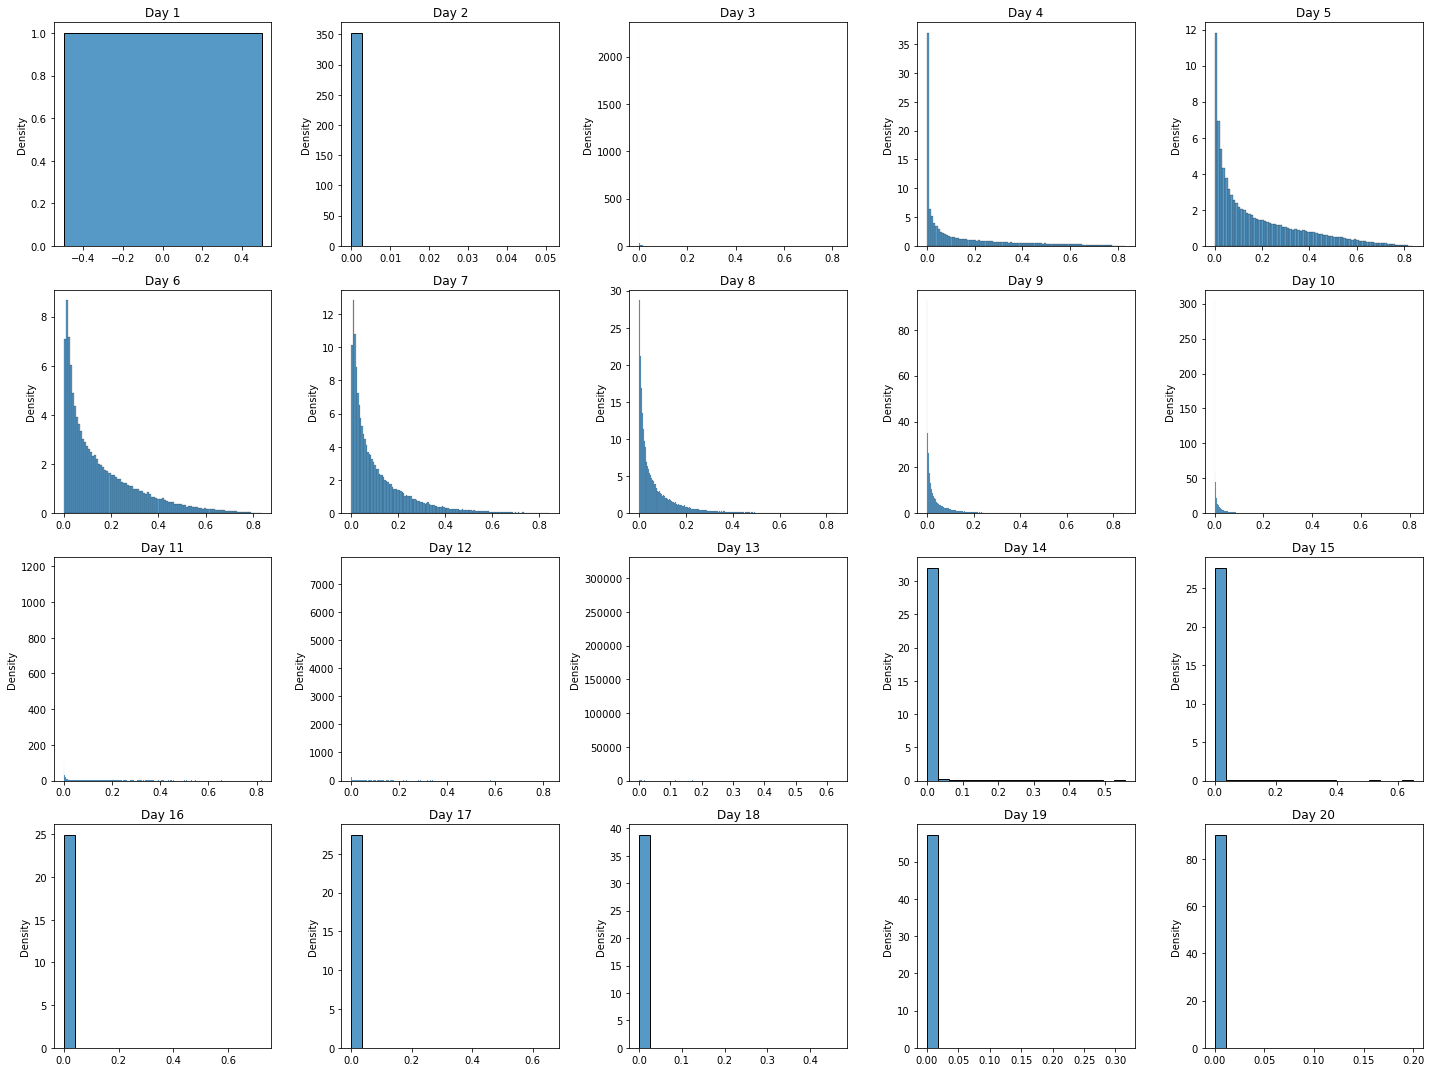

In [190]:
pwr = 2.5
transf_data = data**pwr
fig, axes = plt.subplots(4,5,figsize=(20,15))
for i, ax in tqdm(enumerate(axes.flatten()),total=20):
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        sns.histplot(transf_data[:,i+1], ax = ax, kde=False, stat='density', line_kws={'color':'r'})
        ax.set_title(f"Day {i+1}")
plt.tight_layout()

<AxesSubplot:ylabel='Density'>

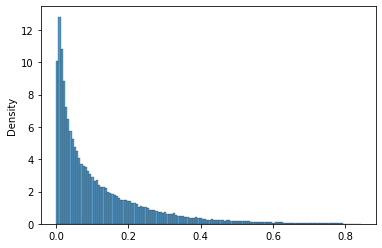

In [197]:
sns.histplot(data[:,7]**2.5, kde=False, stat='density')

Text(0.5, 0, 'pow(Number of Secondary Infections,2.5)')

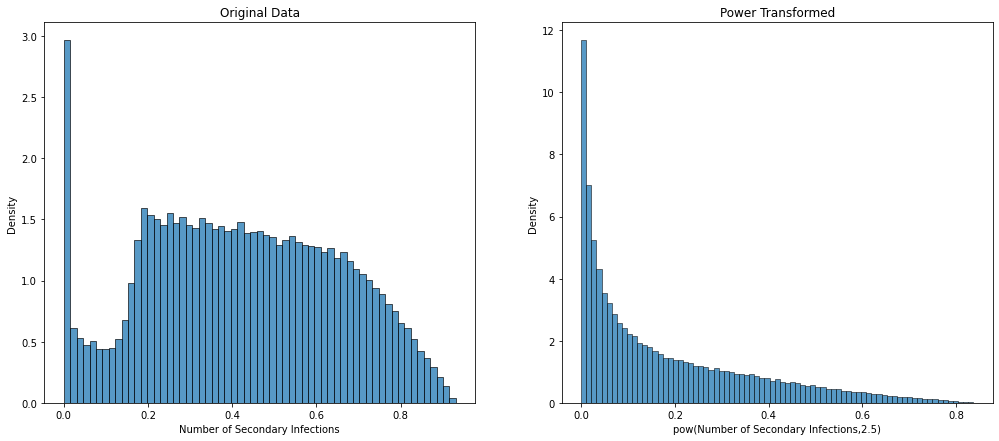

In [36]:
i = 5
power = 2.5
fig, axes = plt.subplots(1,2, figsize=(17,7))
sns.histplot(data[:,i], ax = axes[0], kde=False, stat='density')
sns.histplot(np.power(data[:,i],power), ax = axes[1], kde=False, stat='density')
axes[0].set_title("Original Data")
axes[0].set_xlabel("Number of Secondary Infections")
axes[1].set_title("Power Transformed")
axes[1].set_xlabel("pow(Number of Secondary Infections,2.5)")

Text(0.5, 0, 'exp(Number of Secondary Infections)')

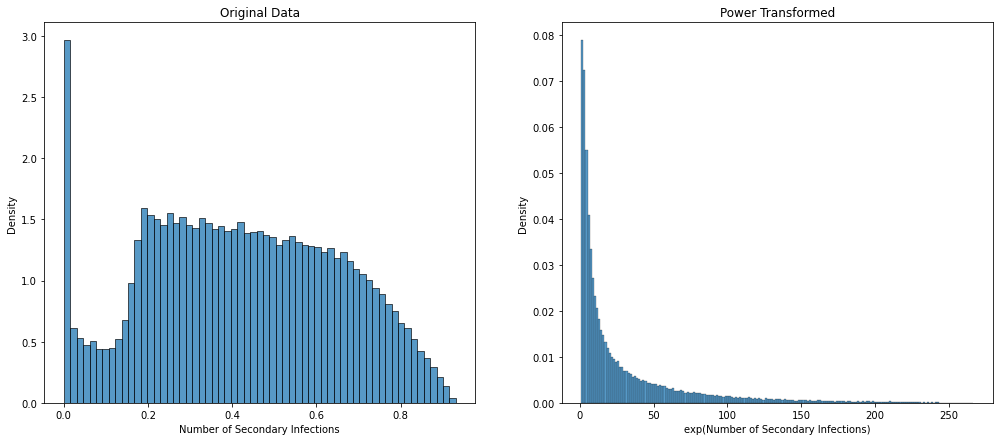

In [20]:
i = 5
power = 2.5
a = 6 # Coefficient for 
fig, axes = plt.subplots(1,2, figsize=(17,7))
sns.histplot(data[:,i], ax = axes[0], kde=False, stat='density')
sns.histplot(np.exp(data[:,i]*6), ax = axes[1], kde=False, stat='density')
axes[0].set_title("Original Data")
axes[0].set_xlabel("Number of Secondary Infections")
axes[1].set_title("Power Transformed")
axes[1].set_xlabel("exp(Number of Secondary Infections)")

In [11]:
days = pickle.load(open("InfDistFitData.p","rb"))
for day in days:
    print(day['day'])
    print(f"   {day['dist'].name} -> params:",*day['params'],"\n")

0
   alpha -> params: 1.2778785050926098 0.0026112519417539615 1.016860859112349e-28 

1
   alpha -> params: 1.2778785050926098 0.0026112519417539615 1.016860859112349e-28 

2
   tukeylambda -> params: 0.01265067319974169 0.004608026278675413 0.0035299271499470166 

3
   alpha -> params: 1.6987531021711002e-08 -0.0016172000763458776 0.0023700523080473802 

4
   mielke -> params: 0.29951634975650143 3.7242232326142126 -5.3330414378003946e-30 0.9905622491763655 

5
   gompertz -> params: 0.19665281276345337 -4.417534678651642e-09 0.2829898214579835 

6
   johnsonsb -> params: 0.31054632423055273 1.2787378272949599 -0.08687314697586485 1.1294141258603148 

7
   johnsonsb -> params: 0.9948279008007542 1.3744308588621266 -0.039308398869368766 1.177017272977018 

8
   johnsonsb -> params: 1.3588665486808709 1.3045955432963423 -0.03696218937662146 1.1680564438809906 

9
   genhalflogistic -> params: 0.15529225786522827 -7.782196959799388e-11 0.1873496105519378 

10
   recipinvgauss -> params:

In [12]:
def plot_day(n,day_list, ax=None):
    matches = list(filter(lambda x: x['day']==n, days))
    if len(matches) != 1:
        raise ValueError("Day not in dataset")
    
    data_dict = matches[0]
    data = data_dict['data']
    dist = data_dict['dist']
    params = data_dict['params']
    xs = np.linspace(data.min(),data.max())
    ys = dist.pdf(xs,*params)
    if ax:
        sns.histplot(data,stat='density',ax=ax)
        ax.plot(xs,ys,'r--')
        ax.set_title(f"Day {n}")
    else:
        plt.hist(data, density=True, bins='auto')
        plt.plot(xs,ys,'r--')
        plt.title(f"Day {n}")

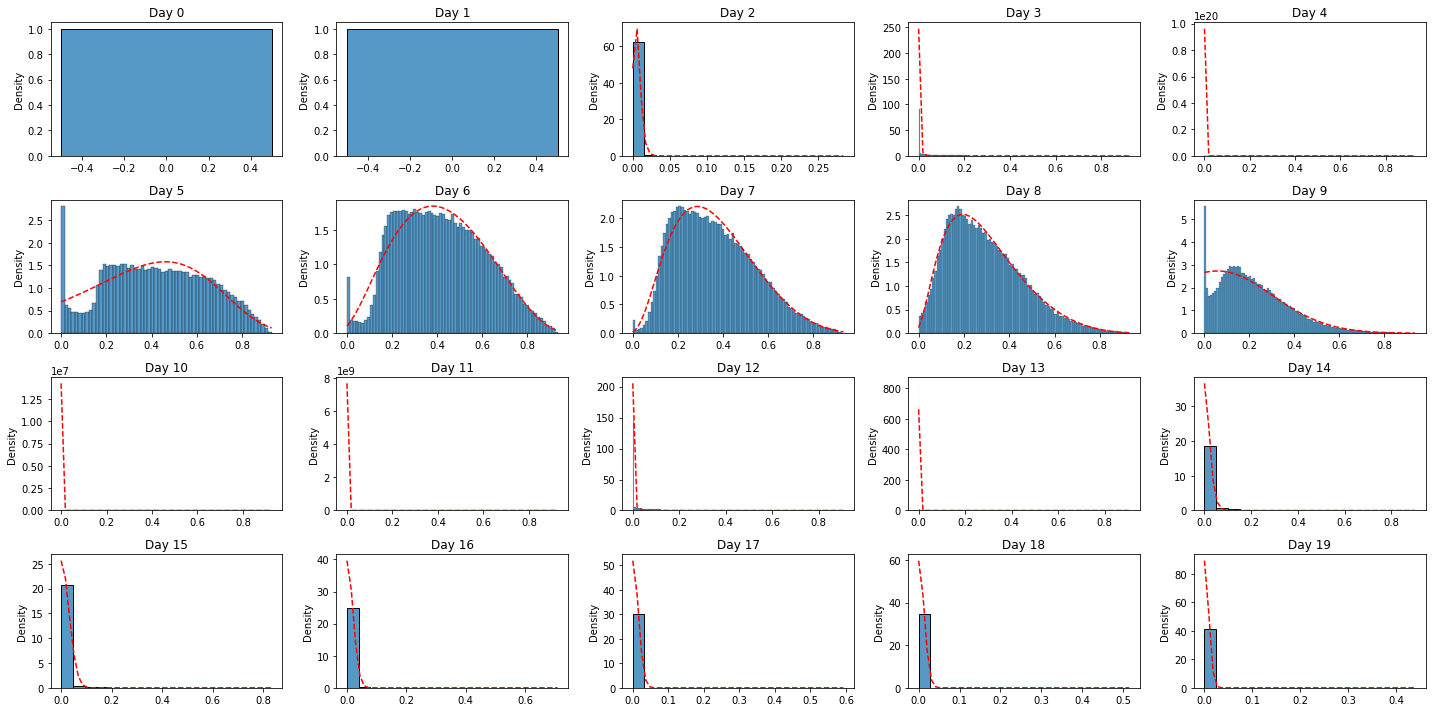

In [13]:
fig, axes = plt.subplots(4,5, figsize=(20,10))
for i,ax in enumerate(axes.flatten()):
    plot_day(i,days,ax=ax)

plt.tight_layout()
plt.show()

# Integration Tests

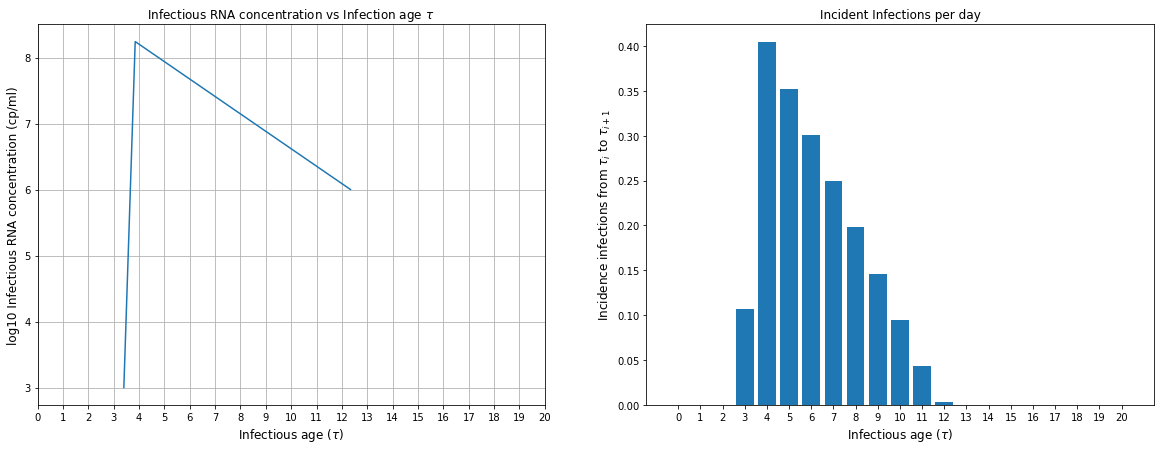

In [14]:
i = 0 # Sample individual number
fig, axes = plt.subplots(1,2,figsize=(20,7))
plot_beta(beta_arr[i],axes[0])
axes[0].grid()
axes[0].set_xlabel(r"Infectious age ($\tau$)", fontsize=12)
axes[0].set_ylabel("log10 Infectious RNA concentration (cp/ml)", fontsize=12)
axes[0].set_xticks(np.arange(0,21))
axes[0].set_title(r"Infectious RNA concentration vs Infection age $\tau$")
axes[1].bar(np.arange(0,21),data[i])
axes[1].set_xlabel(r"Infectious age ($\tau$)", fontsize=12)
axes[1].set_ylabel(r"Incidence infections from $\tau_i$ to $\tau_{i+1}$", fontsize=12)
axes[1].set_xticks(np.arange(0,21))
axes[1].set_title("Incident Infections per day")
plt.show()

# Mean of Samples

In [130]:
N = 100_000
sample_size = 10

sample_data = [] # Mean infections of 10 people
for i in tqdm(range(N)):
    indices = np.random.choice(np.arange(data.shape[0]),sample_size)
    sample_data.append(data[indices].mean(axis=0))

sample_data = np.array(sample_data)

100%|██████████| 100000/100000 [00:12<00:00, 7726.44it/s]


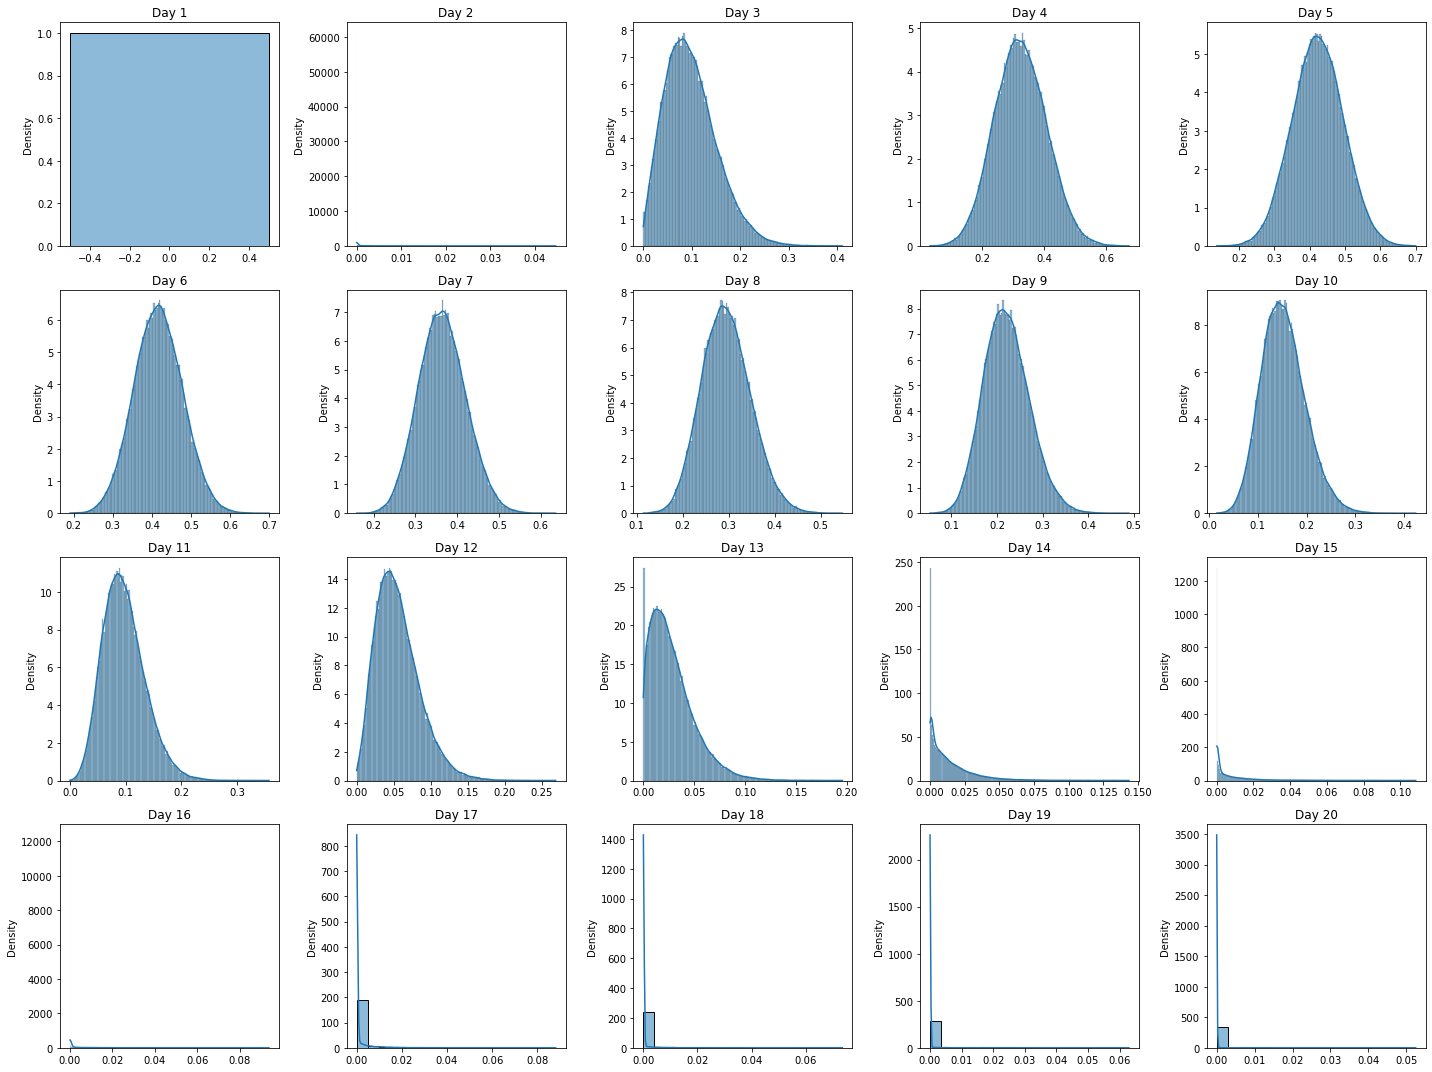

In [131]:
fig, axes = plt.subplots(4,5,figsize=(20,15))
for i, ax in enumerate(axes.flatten()):
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        sns.histplot(sample_data[:,i+1], ax = ax, kde=True, stat='density', line_kws={'color':'r'})
        ax.set_title(f"Day {i+1}")
plt.tight_layout()